In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = '/content/drive/MyDrive/Activity.csv'
df= pd.read_csv(file_path)

In [ ]:
df.head()

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
0,6117666160,4/20/2016,8.02,8.02,0.0,2.03,0.48,5.52,0.0,26,10,349,587,10449,2536
1,1644430081,4/13/2016,5.82,5.82,0.0,2.28,0.90,2.64,0.0,30,16,135,1259,8001,2902
2,1927972279,4/25/2016,0.11,0.11,0.0,0.00,0.00,0.11,0.0,0,0,12,1303,152,2100
3,6117666160,4/26/2016,7.21,7.21,0.0,0.00,0.34,6.87,0.0,0,7,352,1077,9543,2450
4,4388161847,5/9/2016,7.86,7.86,0.0,0.34,0.73,6.79,0.0,6,19,258,1020,10218,3013


In [ ]:
df.tail()

,UserID,Date,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
935,1844505072,4/26/2016,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0,0,0,1440,0,1347
936,2873212765,4/17/2016,1.70,1.70,0.0,0.00,0.35,1.34,0.0,0,8,160,1272,2524,1529
937,8583815059,4/23/2016,7.35,7.35,0.0,0.53,2.03,4.75,0.0,7,44,238,1151,9423,3012
938,4388161847,5/5/2016,7.38,7.38,0.0,0.63,1.67,5.09,0.0,12,39,199,896,9603,2899
939,1844505072,4/22/2016,3.55,3.55,0.0,0.00,0.00,3.55,0.0,0,0,220,1220,5372,1827


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   UserID                      940 non-null    int64  
 1   Date                        940 non-null    object 
 2   Total_Distance              940 non-null    float64
 3   Tracker_Distance            940 non-null    float64
 4   Logged_Activities_Distance  940 non-null    float64
 5   Very_Active_Distance        940 non-null    float64
 6   Moderately_Active_Distance  940 non-null    float64
 7   Light_Active_Distance       940 non-null    float64
 8   Sedentary_Active_Distance   940 non-null    float64
 9   Very_Active_Minutes         940 non-null    int64  
 10  Fairly_Active_Minutes       940 non-null    int64  
 11  Lightly_Active_Minutes      940 non-null    int64  
 12  Sedentary_Minutes           940 non-null    int64  
 13  Steps                       940 non

In [ ]:
df.describe()

,UserID,Total_Distance,Tracker_Distance,Logged_Activities_Distance,Very_Active_Distance,Moderately_Active_Distance,Light_Active_Distance,Sedentary_Active_Distance,Very_Active_Minutes,Fairly_Active_Minutes,Lightly_Active_Minutes,Sedentary_Minutes,Steps,Calories_Burned
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,7637.910638,2303.609574
std,2.424805e+09,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,5087.150742,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,3789.750000,1828.500000
50%,4.445115e+09,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,7405.500000,2134.000000
75%,6.962181e+09,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,10727.000000,2793.250000
max,8.877689e+09,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,36019.000000,4900.000000


In [ ]:
df.shape

(940, 15)

In [ ]:
df.columns

Index(['UserID', 'Date', 'Total_Distance', 'Tracker_Distance',
       'Logged_Activities_Distance', 'Very_Active_Distance',
       'Moderately_Active_Distance', 'Light_Active_Distance',
       'Sedentary_Active_Distance', 'Very_Active_Minutes',
       'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Sedentary_Minutes',
       'Steps', 'Calories_Burned'],
      dtype='object')

In [ ]:
df.dtypes

,0
UserID,int64
Date,object
Total_Distance,float64
Tracker_Distance,float64
Logged_Activities_Distance,float64
Very_Active_Distance,float64
Moderately_Active_Distance,float64
Light_Active_Distance,float64
Sedentary_Active_Distance,float64
Very_Active_Minutes,int64


In [ ]:
df.nunique()

,0
UserID,33
Date,31
Total_Distance,615
Tracker_Distance,613
Logged_Activities_Distance,19
Very_Active_Distance,333
Moderately_Active_Distance,211
Light_Active_Distance,491
Sedentary_Active_Distance,9
Very_Active_Minutes,122


In [ ]:
df.isnull().sum()

,0
UserID,0
Date,0
Total_Distance,0
Tracker_Distance,0
Logged_Activities_Distance,0
Very_Active_Distance,0
Moderately_Active_Distance,0
Light_Active_Distance,0
Sedentary_Active_Distance,0
Very_Active_Minutes,0


In [ ]:

df['Date'] = pd.to_datetime(df['Date'])

# Now calculate the correlation
corr = df.corr()
corr.shape

(15, 15)

<Axes: >

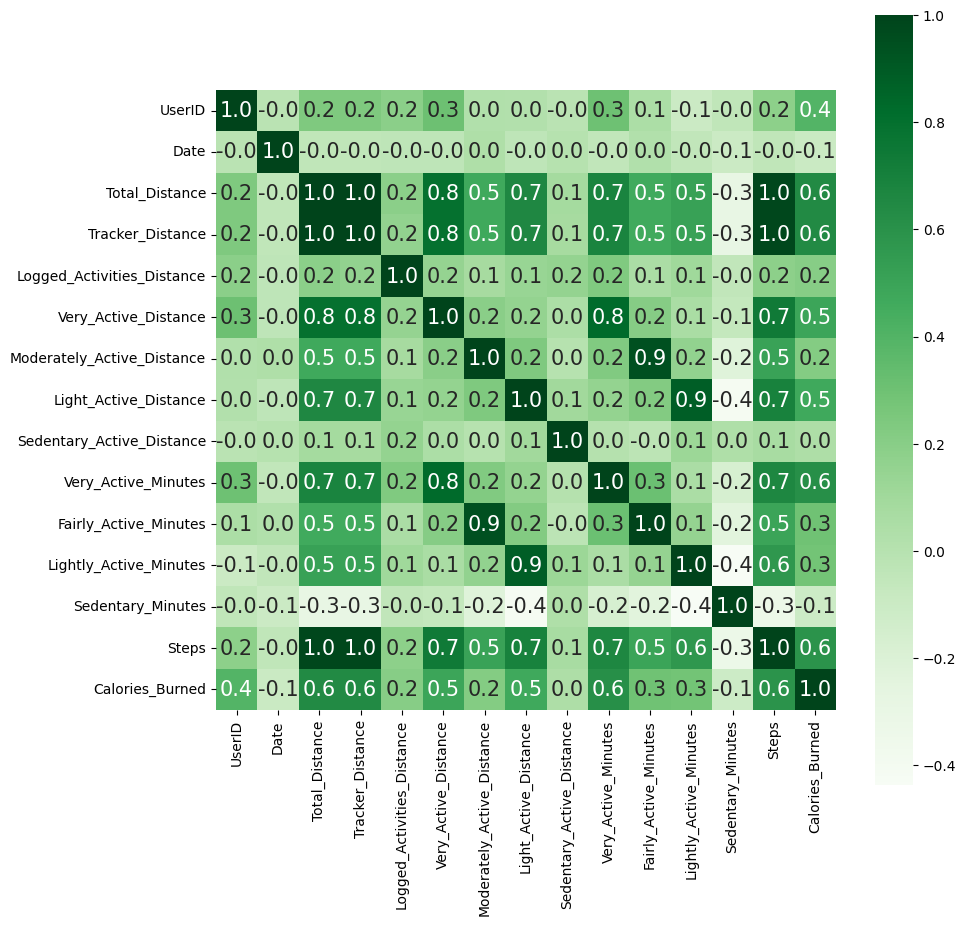

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Greens')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select predictors and target variable
features = df[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes',
                 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance']]
target = df['Calories_Burned']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = lr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R²: {r2}")


MAE: 306.13711423887685, MSE: 155066.07093445538, R²: 0.693693769156959


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust n_estimators
rf_model.fit(X_train, y_train)

# Predict on the test set
rf_y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

print(f"Random Forest - MAE: {rf_mae}, MSE: {rf_mse}, R²: {rf_r2}")


Random Forest - MAE: 330.53944903451355, MSE: 181937.61507753053, R²: 0.6406136765629005


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train a Gradient Boosting Regressor
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)  # You can adjust n_estimators and learning_rate
gb_model.fit(X_train, y_train)

# Predict on the test set
gb_y_pred = gb_model.predict(X_test)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, gb_y_pred)
gb_mse = mean_squared_error(y_test, gb_y_pred)
gb_r2 = r2_score(y_test, gb_y_pred)

print(f"Gradient Boosting - MAE: {gb_mae}, MSE: {gb_mse}, R²: {gb_r2}")


Gradient Boosting - MAE: 354.79728290449594, MSE: 190795.6998442192, R²: 0.6231160606046072


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Select predictors and target variable
features = df[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes',
                 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance']]
target = df['Calories_Burned']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a Support Vector Regression model
svr_model = SVR(kernel='rbf')  # You can experiment with other kernels like 'linear', 'poly', etc.
svr_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svr_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R²: {r2}")


MAE: 512.5620836725425, MSE: 472476.8650288374, R²: 0.06670358760368711


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Select predictors and target variable
features = df[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes',
                 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance']]
target = df['Calories_Burned']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features (important for SVM and other algorithms like Random Forest and Decision Tree)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression (SVM)": SVR(kernel='rbf'),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

# Dictionary to store evaluation results
evaluation_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    if model_name == "Support Vector Regression (SVM)":
        model.fit(X_train_scaled, y_train)  # SVM needs scaled data
    else:
        model.fit(X_train, y_train)  # Other models don't necessarily need scaling

    # Predict on the test set
    y_pred = model.predict(X_test_scaled if model_name == "Support Vector Regression (SVM)" else X_test)

    # Evaluate the model
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    evaluation_results[model_name] = {
        "MAE": mae,
        "MSE": mse,
        "R²": r2
    }

# Print evaluation results for all models
for model_name, metrics in evaluation_results.items():
    print(f"{model_name}:")
    print(f"  MAE: {metrics['MAE']:.4f}")
    print(f"  MSE: {metrics['MSE']:.4f}")
    print(f"  R²: {metrics['R²']:.4f}")
    print("-" * 50)


Linear Regression:
  MAE: 306.1371
  MSE: 155066.0709
  R²: 0.6937
--------------------------------------------------
Support Vector Regression (SVM):
  MAE: 516.2201
  MSE: 480979.7706
  R²: 0.0499
--------------------------------------------------
Gradient Boosting Regressor:
  MAE: 354.7973
  MSE: 190795.6998
  R²: 0.6231
--------------------------------------------------
Random Forest Regressor:
  MAE: 330.5394
  MSE: 181937.6151
  R²: 0.6406
--------------------------------------------------


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming 'df', 'features', and 'target' are already defined
# Select predictors and target variable
features = df[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes',
                 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance']]
target = df['Calories_Burned']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# List of models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression (SVM)": SVR(kernel='rbf'),
    "Gradient Boosting Regressor": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42)
}

# Dictionary to store predictions
predictions = {}

# Train and make predictions for each model
for model_name, model in models.items():
    if model_name == "Support Vector Regression (SVM)":
         model.fit(X_train_scaled, y_train)
         predictions[model_name] = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        predictions[model_name] = model.predict(X_test)

# Store y_test as y_true for evaluation purposes
y_true = y_test
y_pred_lr = predictions["Linear Regression"]
y_pred_svr = predictions["Support Vector Regression (SVM)"]
y_pred_gbr = predictions["Gradient Boosting Regressor"]
y_pred_rfr = predictions["Random Forest Regressor"]


# Linear Regression
r2_lr = r2_score(y_true, y_pred_lr)
accuracy_lr = r2_lr * 100  # Convert R² to percentage
mae_lr = mean_absolute_error(y_true, y_pred_lr)
mse_lr = mean_squared_error(y_true, y_pred_lr)

# Support Vector Regression (SVM)
r2_svr = r2_score(y_true, y_pred_svr)
accuracy_svr = r2_svr * 100  # Convert R² to percentage
mae_svr = mean_absolute_error(y_true, y_pred_svr)
mse_svr = mean_squared_error(y_true, y_pred_svr)

# Gradient Boosting Regressor
r2_gbr = r2_score(y_true, y_pred_gbr)
accuracy_gbr = r2_gbr * 100  # Convert R² to percentage
mae_gbr = mean_absolute_error(y_true, y_pred_gbr)
mse_gbr = mean_squared_error(y_true, y_pred_gbr)

# Random Forest Regressor
r2_rfr = r2_score(y_true, y_pred_rfr)
accuracy_rfr = r2_rfr * 100  # Convert R² to percentage
mae_rfr = mean_absolute_error(y_true, y_pred_rfr)
mse_rfr = mean_squared_error(y_true, y_pred_rfr)

# Print the results as percentages
print("Linear Regression:")
print(f"Accuracy: {accuracy_lr:.2f}%, MAE: {mae_lr:.4f}, MSE: {mse_lr:.4f}")
print("-" * 50)

print("Support Vector Regression (SVM):")
print(f"Accuracy: {accuracy_svr:.2f}%, MAE: {mae_svr:.4f}, MSE: {mse_svr:.4f}")
print("-" * 50)

print("Gradient Boosting Regressor:")
print(f"Accuracy: {accuracy_gbr:.2f}%, MAE: {mae_gbr:.4f}, MSE: {mse_gbr:.4f}")
print("-" * 50)

print("Random Forest Regressor:")
print(f"Accuracy: {accuracy_rfr:.2f}%, MAE: {mae_rfr:.4f}, MSE: {mse_rfr:.4f}")

Linear Regression:
Accuracy: 69.37%, MAE: 306.1371, MSE: 155066.0709
--------------------------------------------------
Support Vector Regression (SVM):
Accuracy: 4.99%, MAE: 516.2201, MSE: 480979.7706
--------------------------------------------------
Gradient Boosting Regressor:
Accuracy: 62.31%, MAE: 354.7973, MSE: 190795.6998
--------------------------------------------------
Random Forest Regressor:
Accuracy: 64.06%, MAE: 330.5394, MSE: 181937.6151


In [ ]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Assuming X_train, y_train, X_test, and y_test are already defined

# Ridge Regression
ridge = Ridge()
param_grid_ridge = {'alpha': [0.1, 1, 10, 100]}  # Regularization parameter
grid_search_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_

# Make predictions and evaluate
y_pred_ridge = best_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
accuracy_ridge = r2_ridge * 100
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

print(f"Ridge Regression - Accuracy: {accuracy_ridge:.2f}%, MAE: {mae_ridge:.4f}, MSE: {mse_ridge:.4f}")

# Lasso Regression
lasso = Lasso()
param_grid_lasso = {'alpha': [0.1, 1, 10, 100]}  # Regularization parameter
grid_search_lasso = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)
best_lasso = grid_search_lasso.best_estimator_

# Make predictions and evaluate
y_pred_lasso = best_lasso.predict(X_test)
r2_lasso = r2_score(y_test, y_pred_lasso)
accuracy_lasso = r2_lasso * 100
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print(f"Lasso Regression - Accuracy: {accuracy_lasso:.2f}%, MAE: {mae_lasso:.4f}, MSE: {mse_lasso:.4f}")


Ridge Regression - Accuracy: 69.35%, MAE: 306.2379, MSE: 155152.3925
Lasso Regression - Accuracy: 69.37%, MAE: 306.1494, MSE: 155083.6736


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df', 'features', and 'target' are already defined
# Select predictors and target variable
features = df[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes',
                 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance']]
target = df['Calories_Burned']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Instantiate PolynomialFeatures (degree 2 for quadratic features)
poly = PolynomialFeatures(degree=2)

# Apply polynomial transformation to training data
X_train_poly = poly.fit_transform(X_train) # Fit and transform training data

# Now train your model using the transformed features
model = LinearRegression()
model.fit(X_train_poly, y_train)  # Fit model using the transformed training features


# Example input values
new_data = {
    'Steps': 13238,
    'Very_Active_Minutes': 43,
    'Fairly_Active_Minutes': 52,
    'Lightly_Active_Minutes': 3.41,
    'Total_Distance': 9.2,
    'Very_Active_Distance': 3.69,
    'Moderately_Active_Distance': 2.1
}

# Convert input into a DataFrame (same format as training data)
new_input = pd.DataFrame([new_data])

# Transform the new input using the fitted polynomial features
X_new_poly = poly.transform(new_input)

# Make Prediction
predicted_calories = model.predict(X_new_poly)

print(f"Predicted Calories_Burned: {predicted_calories[0]}")

Predicted Calories_Burned: 1807.9711777374928


In [ ]:
# Example input values
new_data = {
    'Steps': 8237,
    'Very_Active_Minutes': 23,
    'Fairly_Active_Minutes': 16,
    'Lightly_Active_Minutes': 233,
    'Total_Distance': 5.44,
    'Very_Active_Distance': 1.61,
    'Moderately_Active_Distance': 1
}

# Convert input into a DataFrame (same format as training data)
new_input = pd.DataFrame([new_data])

# Transform the new input using the fitted polynomial features
X_new_poly = poly.transform(new_input)

# Make Prediction
predicted_calories = model.predict(X_new_poly)

print(f"Predicted Calories_Burned: {predicted_calories[0]}")

Predicted Calories_Burned: 1893.388286827114


In [ ]:
import numpy as np
from scipy.stats import zscore

# Calculate Z-scores
z_scores = np.abs(zscore(new_input))

# Find rows where any Z-score is greater than 3 (outliers)
outliers = np.where(z_scores > 3)
print(f"Outlier indices: {outliers}")


Outlier indices: (array([], dtype=int64), array([], dtype=int64))


In [ ]:
from sklearn.model_selection import cross_val_score

# Apply cross-validation
cv_scores = cross_val_score(best_ridge, X_train, y_train, cv=5)  # 5-fold cross-validation
print(f"Cross-validation scores: {cv_scores}")
print(f"Average CV score: {cv_scores.mean()}")

Cross-validation scores: [0.75010446 0.72512018 0.73915686 0.78664069 0.71384853]
Average CV score: 0.7429741444402506


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso

# Set up the grid of hyperparameters
param_grid = {'alpha': [0.1, 1.0, 10.0, 100.0]}

# GridSearchCV for Ridge Regression
ridge_search = GridSearchCV(Ridge(), param_grid, cv=5)
ridge_search.fit(X_train, y_train)

print(f"Best alpha for Ridge: {ridge_search.best_params_['alpha']}")
best_ridge_model = ridge_search.best_estimator_

# GridSearchCV for Lasso Regression
lasso_search = GridSearchCV(Lasso(), param_grid, cv=5)
lasso_search.fit(X_train, y_train)

print(f"Best alpha for Lasso: {lasso_search.best_params_['alpha']}")
best_lasso_model = lasso_search.best_estimator_


Best alpha for Ridge: 1.0
Best alpha for Lasso: 0.1


In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Get feature importance
feature_importances = rf_model.feature_importances_
print(f"Feature importances: {feature_importances}")


Feature importances: [0.11785227 0.33951068 0.03192727 0.07285534 0.361353   0.04740374
 0.02909769]


In [ ]:
from sklearn.model_selection import cross_val_score

# Apply cross-validation to Ridge and Lasso
ridge_scores = cross_val_score(best_ridge_model, X_train, y_train, cv=5)
lasso_scores = cross_val_score(best_lasso_model, X_train, y_train, cv=5)

print(f"Ridge cross-validation scores: {ridge_scores}")
print(f"Lasso cross-validation scores: {lasso_scores}")


Ridge cross-validation scores: [0.75010446 0.72512018 0.73915686 0.78664069 0.71384853]
Lasso cross-validation scores: [0.75001466 0.72471667 0.7389899  0.78720532 0.71370471]


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate and train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predict using Gradient Boosting
gb_predicted = gb_model.predict(new_input)
print(f"Gradient Boosting Predicted Calories: {gb_predicted[0]}")


Gradient Boosting Predicted Calories: 1997.577534625144


In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'df', 'features', and 'target' are already defined
# Select predictors and target variable
features = df[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes',
                 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance']]
target = df['Calories_Burned']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Instantiate and train the Gradient Boosting model
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Predict using Gradient Boosting
predicted_values = gb_model.predict(X_test)  # Assign predictions to 'predicted_values'
# Calculate RMSE
mse = mean_squared_error(y_test, predicted_values)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse}")

RMSE: 437.05778765168003


In [ ]:
# Imports
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import numpy as np

# Load and prepare data
features = [
    'Total_Distance', 'Tracker_Distance', 'Logged_Activities_Distance',
    'Very_Active_Distance', 'Moderately_Active_Distance', 'Light_Active_Distance',
    'Sedentary_Active_Distance', 'Very_Active_Minutes', 'Fairly_Active_Minutes',
    'Lightly_Active_Minutes', 'Sedentary_Minutes', 'Steps'
]
target = 'Calories_Burned'

X = df[features]
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42)

# Hyperparameter tuning with GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best model
best_gbr = grid_search.best_estimator_

# Predictions
y_pred = best_gbr.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output
print(f"Best Parameters: {grid_search.best_params_}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"R²: {r2}")


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
MAE: 321.1569944021084
MSE: 159614.9761929636
R²: 0.6847081927778123


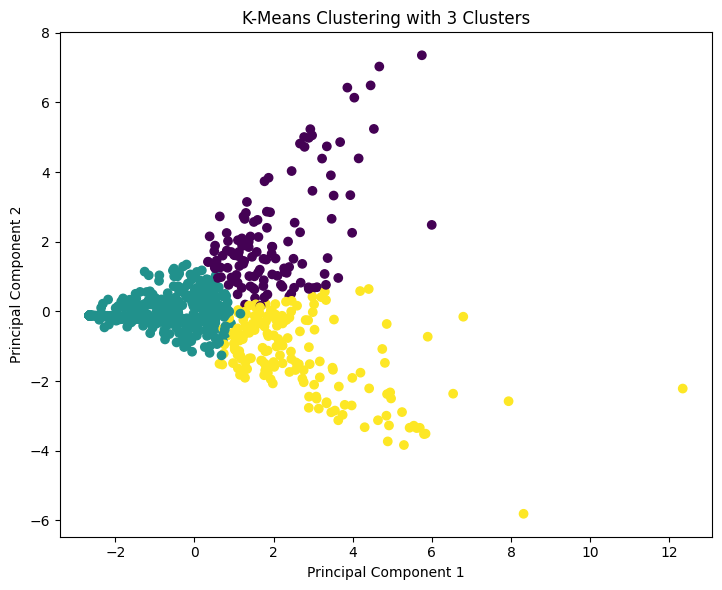

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Select features for clustering (you can add or remove based on your needs)
features = df[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes',
                 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance']]

# Standardize the features
scaler = StandardScaler()
scaled_features= scaler.fit_transform(features)
# Apply KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(scaled_features)
# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plotting the clusters for k=3
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels_3, cmap='viridis', marker='o')
plt.title('K-Means Clustering with 3 Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()


<ipython-input-33-657d4b130665>:7: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  calories_data = calories_data.fillna(method='ffill')  # Fill missing values if any


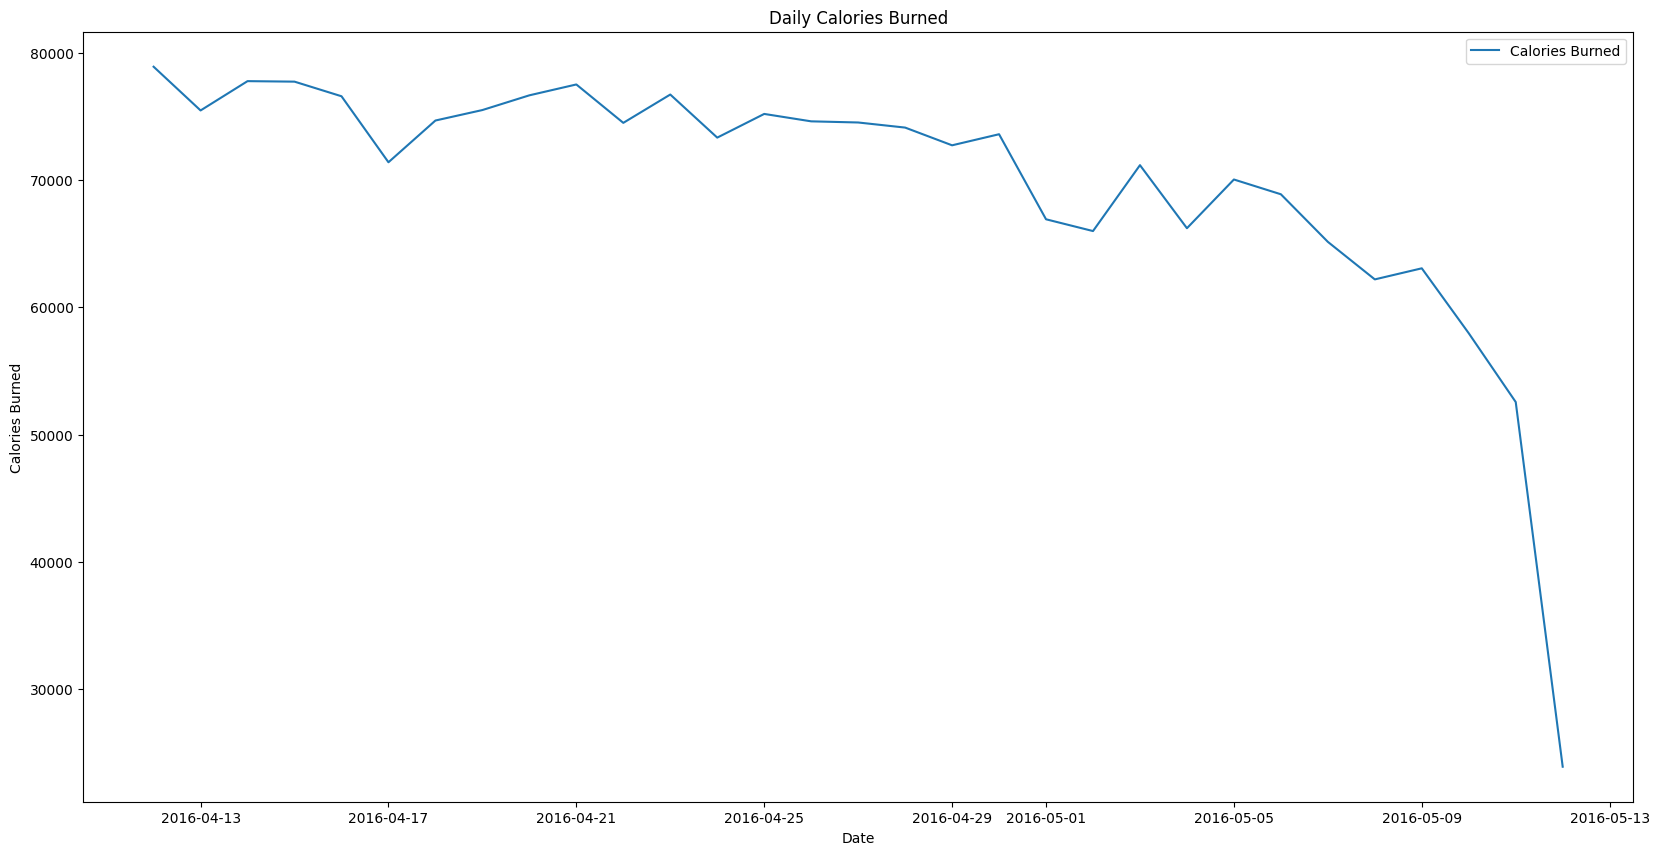

In [ ]:
# Aggregate calories burned daily
# Assuming 'Date' is already the index, if not, uncomment the following two lines:
df['Date'] = pd.to_datetime(df['Date'])  # Convert 'Date' column to datetime if it's not already
df = df.set_index('Date')  # Set 'Date' column as the index if it's not already

calories_data = df['Calories_Burned'].resample('D').sum()  # Resample to daily data
calories_data = calories_data.fillna(method='ffill')  # Fill missing values if any

# Plot the historical trend
plt.figure(figsize=(20,10))
plt.plot(calories_data, label='Calories Burned')
plt.title('Daily Calories Burned')
plt.xlabel('Date')
plt.ylabel('Calories Burned')
plt.legend()
plt.show()

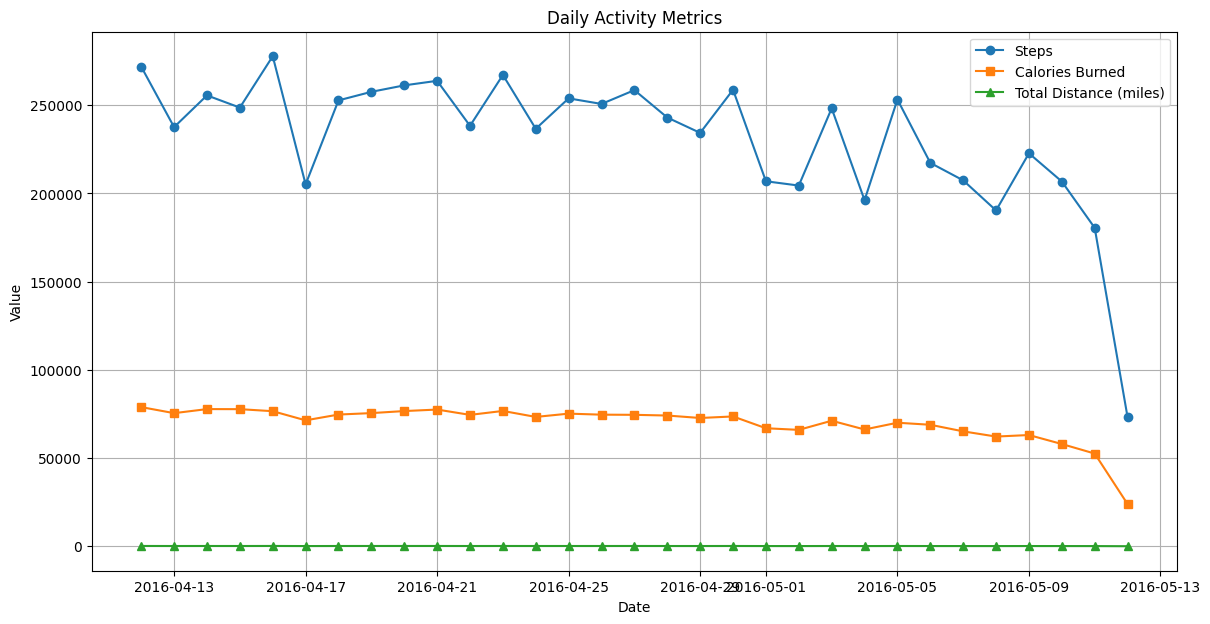

In [ ]:
# Aggregate data by date
daily_data = df.groupby('Date').sum()

# Plot Steps, Calories Burned, and Total Distance by Date
plt.figure(figsize=(14, 7))
plt.plot(daily_data.index, daily_data['Steps'], label='Steps', marker='o')
plt.plot(daily_data.index, daily_data['Calories_Burned'], label='Calories Burned', marker='s')
plt.plot(daily_data.index, daily_data['Total_Distance'], label='Total Distance (miles)', marker='^')
plt.title('Daily Activity Metrics')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()

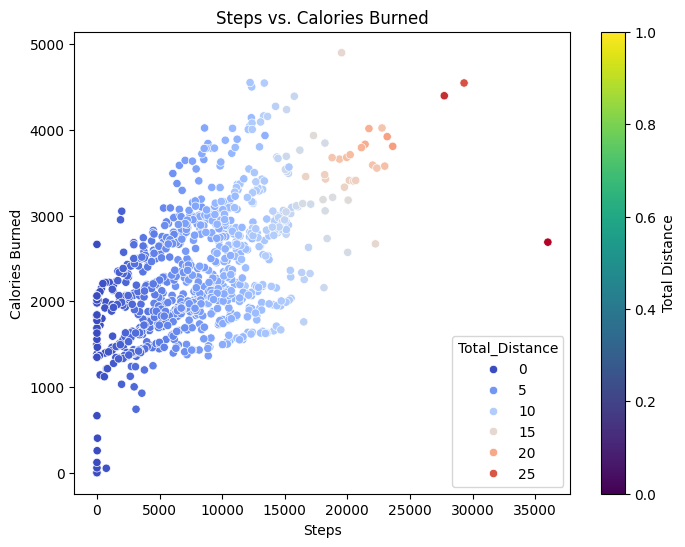

In [ ]:
plt.figure(figsize=(8, 6))
# Create a scatterplot with a colormap for 'Total_Distance'
scatter = sns.scatterplot(data=df, x='Steps', y='Calories_Burned', hue='Total_Distance', palette='coolwarm')
plt.title('Steps vs. Calories Burned')
plt.xlabel('Steps')
plt.ylabel('Calories Burned')
# Create the colorbar and associate it with the scatterplot
plt.colorbar(scatter.collections[0], label='Total Distance')
plt.show()

<ipython-input-36-d741d9bbc666>:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0].set_xticklabels(model_names, rotation=45, ha='right')
<ipython-input-36-d741d9bbc666>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1].set_xticklabels(model_names, rotation=45, ha='right')
<ipython-input-36-d741d9bbc666>:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2].set_xticklabels(model_names, rotation=45, ha='right')


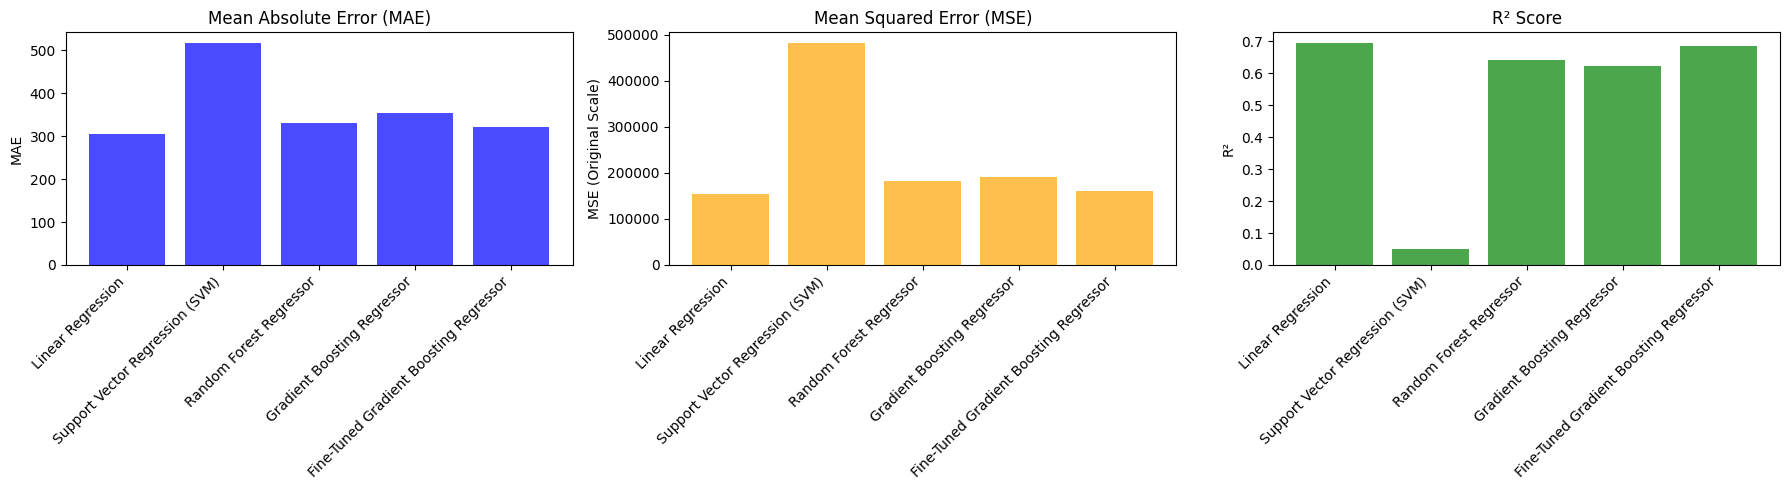

In [ ]:
import matplotlib.pyplot as plt

# Example evaluation results including the fine-tuned Gradient Boosting Regressor
evaluation_results = {
    'Linear Regression': {'MAE': 306.14, 'MSE': 155066.07, 'R²': 0.6937},
    'Support Vector Regression (SVM)': {'MAE': 516.22, 'MSE': 480979.77, 'R²': 0.0499},
    'Random Forest Regressor': {'MAE': 330.54, 'MSE': 181937.62, 'R²': 0.6406},
    'Gradient Boosting Regressor': {'MAE': 354.80, 'MSE': 190795.70, 'R²': 0.6231},
    'Fine-Tuned Gradient Boosting Regressor': {'MAE': 321.15, 'MSE': 159614.97, 'R²': 0.6847}
}

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Extract model names and metric values
model_names = list(evaluation_results.keys())
mae_values = [metrics['MAE'] for metrics in evaluation_results.values()]
mse_values = [metrics['MSE'] for metrics in evaluation_results.values()]
r2_values = [metrics['R²'] for metrics in evaluation_results.values()]

# Plot MAE
axs[0].bar(model_names, mae_values, color='blue', alpha=0.7)
axs[0].set_title('Mean Absolute Error (MAE)')
axs[0].set_ylabel('MAE')
axs[0].set_xticklabels(model_names, rotation=45, ha='right')

# Plot MSE
axs[1].bar(model_names, mse_values, color='orange', alpha=0.7)
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('MSE (Original Scale)')
axs[1].set_xticklabels(model_names, rotation=45, ha='right')

# Plot R²
axs[2].bar(model_names, r2_values, color='green', alpha=0.7)
axs[2].set_title('R² Score')
axs[2].set_ylabel('R²')
axs[2].set_xticklabels(model_names, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()


            Very_Active_Minutes  Fairly_Active_Minutes  \
Date                                                     
2016-04-20                   26                     10   
2016-04-13                   30                     16   
2016-04-25                    0                      0   
2016-04-26                    0                      7   
2016-05-09                    6                     19   

            Lightly_Active_Minutes  Total_Distance Activity_Level  
Date                                                               
2016-04-20                     349            8.02    Very Active  
2016-04-13                     135            5.82    Very Active  
2016-04-25                      12            0.11      Sedentary  
2016-04-26                     352            7.21    Very Active  
2016-05-09                     258            7.86    Very Active  


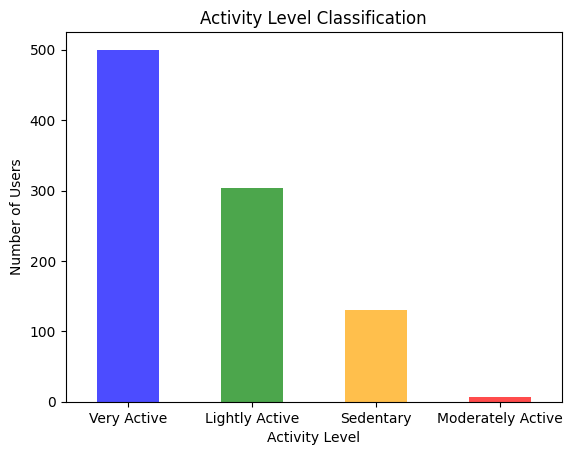

In [ ]:
import pandas as pd

# Define thresholds for classification based on total active minutes or distance
def classify_user(row):
    if row['Very_Active_Minutes'] >= 60 or row['Total_Distance'] >= 5:
        return 'Very Active'
    elif row['Fairly_Active_Minutes'] >= 30 or row['Moderately_Active_Distance'] >= 3:
        return 'Moderately Active'
    elif row['Lightly_Active_Minutes'] >= 60:
        return 'Lightly Active'
    else:
        return 'Sedentary'

# Apply the function to classify each user
df['Activity_Level'] = df.apply(classify_user, axis=1)

# Display the classification result
print(df[['Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes', 'Total_Distance', 'Activity_Level']].head())

# Optional: Count the number of users in each category
activity_counts = df['Activity_Level'].value_counts()

# Plot the activity level distribution
import matplotlib.pyplot as plt

activity_counts.plot(kind='bar', color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.title('Activity Level Classification')
plt.xlabel('Activity Level')
plt.ylabel('Number of Users')
plt.xticks(rotation=0)
plt.show()


In [ ]:
import pandas as pd

# Create Total_Active_Minutes
df['Total_Active_Minutes'] = (
    df['Very_Active_Minutes'] + df['Fairly_Active_Minutes'] + df['Lightly_Active_Minutes']
)

# Calculate Calories per Step
df['Calories_per_Step'] = df['Calories_Burned'] / df['Steps']
# Handle cases where Steps might be zero to avoid division by zero
df['Calories_per_Step'] = df['Calories_per_Step'].fillna(0).replace([float('inf'), -float('inf')], 0)

# Calculate Distance per Minute
df['Distance_per_Minute'] = df['Total_Distance'] / df['Total_Active_Minutes']
# Handle cases where Total_Active_Minutes might be zero
df['Distance_per_Minute'] = df['Distance_per_Minute'].fillna(0).replace([float('inf'), -float('inf')], 0)

# Display the first few rows with new features
print(df[['Total_Active_Minutes', 'Calories_per_Step', 'Distance_per_Minute']].head())


            Total_Active_Minutes  Calories_per_Step  Distance_per_Minute
Date                                                                    
2016-04-20                   385           0.242703             0.020831
2016-04-13                   181           0.362705             0.032155
2016-04-25                    12          13.815789             0.009167
2016-04-26                   359           0.256733             0.020084
2016-05-09                   283           0.294872             0.027774


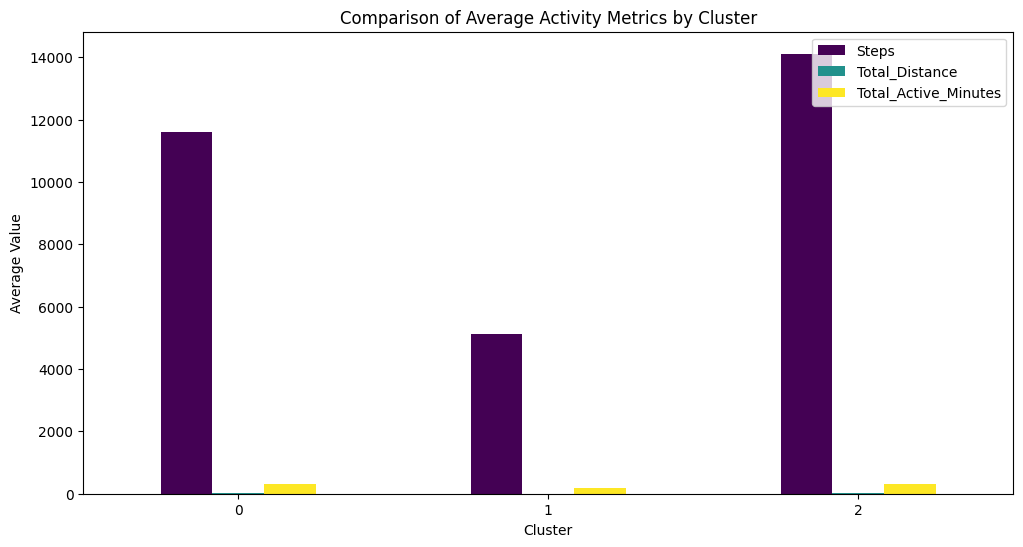

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Select features for clustering (you can add or remove based on your needs)
features = df[['Steps', 'Very_Active_Minutes', 'Fairly_Active_Minutes', 'Lightly_Active_Minutes',
                 'Total_Distance', 'Very_Active_Distance', 'Moderately_Active_Distance']]

# Standardize the features
scaler = StandardScaler()
scaled_features= scaler.fit_transform(features)
# Apply KMeans clustering with 3 clusters
kmeans_3 = KMeans(n_clusters=3, random_state=42)
labels_3 = kmeans_3.fit_predict(scaled_features)

# Add the cluster labels to the DataFrame
df['KMeans_Cluster'] = labels_3 # ADDED: add cluster labels to df

# Reduce dimensions for visualization using PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Assuming data has a 'Cluster' column or 'Activity_Level'
cluster_summary = df.groupby('KMeans_Cluster')[['Steps', 'Total_Distance', 'Total_Active_Minutes']].mean()

# Plot
cluster_summary.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Comparison of Average Activity Metrics by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.show()

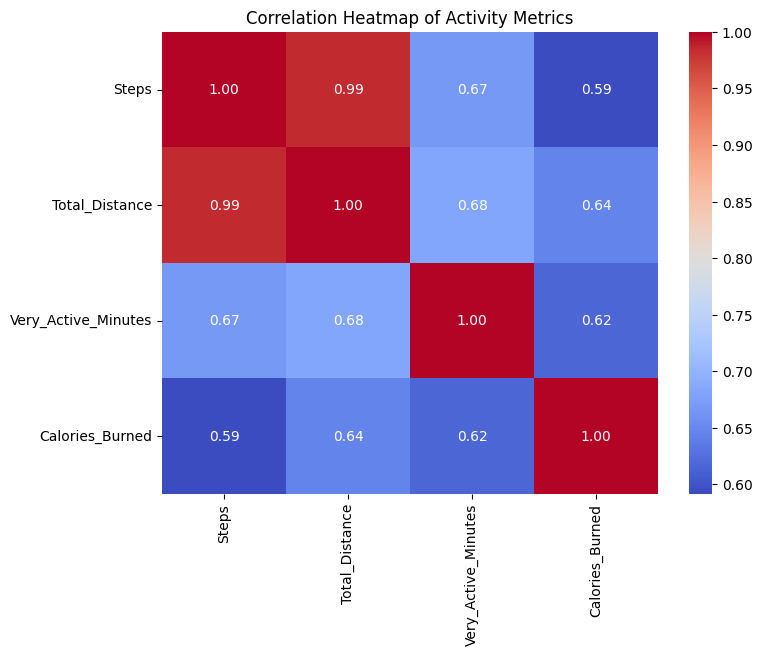

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation = df[['Steps', 'Total_Distance', 'Very_Active_Minutes', 'Calories_Burned']].corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Activity Metrics')
plt.show()
